# Optimizing Inventory Management for XYZ Company

## Data Collection and Preprocessing

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from statsmodels.tsa.arima.model import ARIMA
#from sklearn.metrics import mean_squared_error
import datetime



In [2]:
# Read multiple CSV files and assign variables
invoice_purchases = pd.read_csv("InvoicePurchases12312016.csv")
beginning_inventory = pd.read_csv("BegInvFINAL12312016.csv")
final_inventory = pd.read_csv("EndInvFINAL12312016.csv")
purchase_prices = pd.read_csv("2017PurchasePricesDec.csv")
purchases_final = pd.read_csv("PurchasesFINAL12312016.csv")
sales_final = pd.read_csv("SalesFINAL12312016.csv")

## Exploratory Data Analysis (EDA)

#### Invoice Purchases

In [3]:
invoice_purchases.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


In [4]:
# Checks for null values
invoice_purchases.isnull().sum()

VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64

In [5]:
invoice_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [6]:
# Change the types for multiple columns
invoice_purchases['VendorNumber'] = invoice_purchases['VendorNumber'].astype('category')
invoice_purchases['PONumber'] = invoice_purchases['PONumber'].astype('category')
invoice_purchases['InvoiceDate'] = pd.to_datetime(invoice_purchases['InvoiceDate'])
invoice_purchases['PODate'] = pd.to_datetime(invoice_purchases['PODate'])
invoice_purchases['PayDate'] = pd.to_datetime(invoice_purchases['PayDate'])


In [7]:
# Check for unique values in the approval column
invoice_purchases['Approval'].unique()

array([nan, 'Frank Delahunt'], dtype=object)

In [8]:
# Fills non-approved column with pending status
invoice_purchases['Approval'].fillna('Pending', inplace=True)

/var/folders/qt/dnmwsqj92s92yspch4_ps7180000gn/T/ipykernel_14024/2879500832.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  invoice_purchases['Approval'].fillna('Pending', inplace=True)


In [9]:
# Add two columns and create a new one
invoice_purchases['TotalAmount'] = invoice_purchases['Dollars'] + invoice_purchases['Freight']

# Compute summary statistics
numerical_columns = invoice_purchases[['Quantity', 'Dollars', 'Freight', 'TotalAmount']].describe().round(2)
print(numerical_columns)

        Quantity     Dollars  Freight  TotalAmount
count    5543.00     5543.00  5543.00      5543.00
mean     6058.88    58073.38   295.95     58369.34
std     14453.34   140234.03   713.59    140937.07
min         1.00        4.14     0.02         4.16
25%        83.00      967.81     5.02       972.41
50%       423.00     4765.45    24.73      4790.71
75%      5100.50    44587.18   229.66     44794.50
max    141660.00  1660435.88  8468.22   1668904.10


- Quantity: The mean quantity of items purchases is approximately 6059, with a standard deviation of around 14453, and purchases ranging up to 141660 items.
- Dollars: The mean amount spend on purchases is approximately $58073.38, with a standard deviation of around $140234, and purchases randing from $4.14 to $1,660,435.88.
- Freight: The mean freight is approximately $295.95, with a standard deviation of around $713.59, and freight costs ranging from $0.02 to $8,468.22.
- Total Amount: The mean total amount (including both dollars and freight) is approximately $58,369.34, with a standard deviation of around $140,937.07, and total amounts ranging from $4.16 to $1,668,904.10.

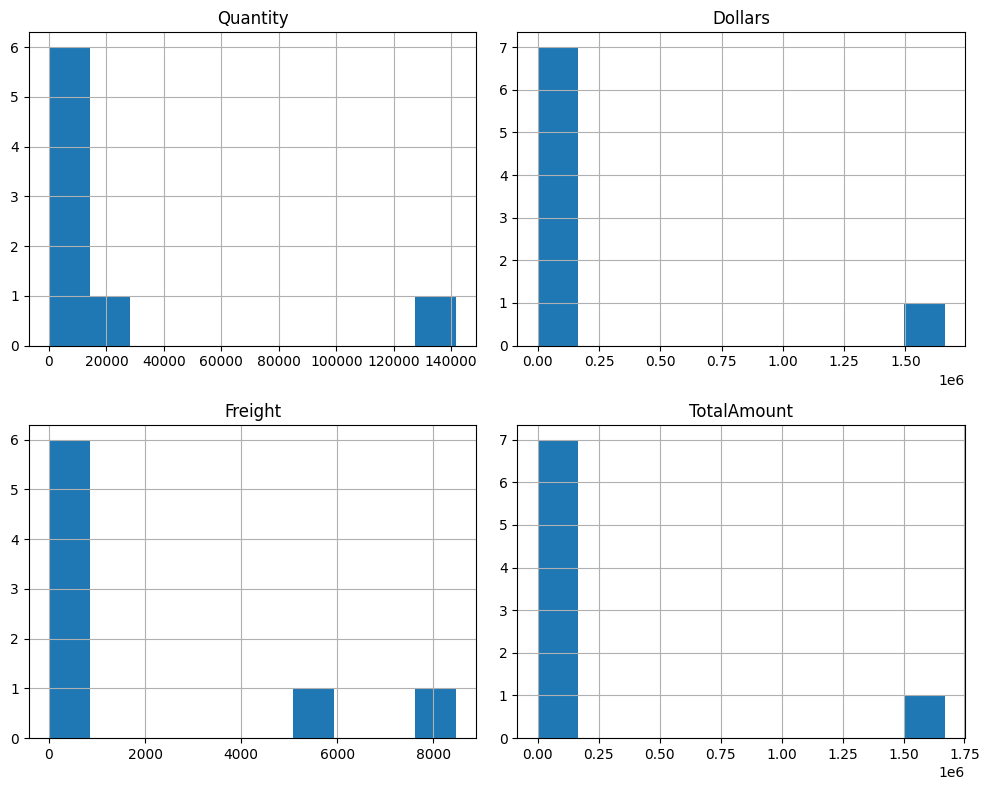

In [10]:
# Visualize histograms
numerical_columns.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

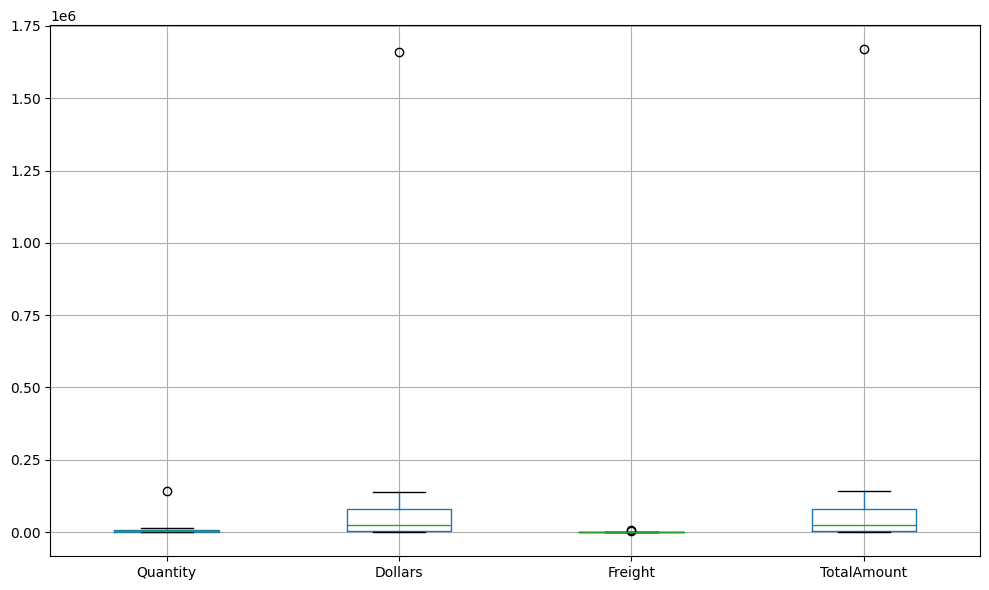

In [11]:
# Visualize box plots
numerical_columns.boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()

VendorName
MHW LTD                        55
TREASURY WINE ESTATES          55
JIM BEAM BRANDS COMPANY        55
KOBRAND CORPORATION            55
STOLI GROUP,(USA) LLC          55
                               ..
FLAVOR ESSENCE INC              1
LAUREATE IMPORTS CO             1
TRUETT HURST                    1
CAPSTONE INTERNATIONAL          1
AAPER ALCOHOL & CHEMICAL CO     1
Name: count, Length: 129, dtype: int64


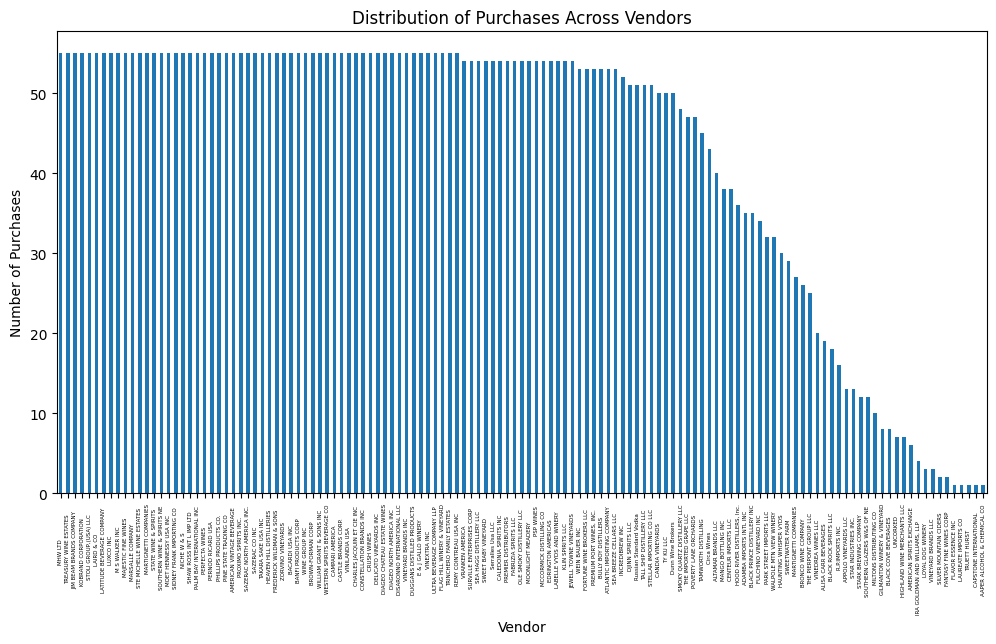

In [12]:
# Distribution of purchases
purchase_counts = invoice_purchases['VendorName'].value_counts()
print(purchase_counts)

# Visualize distribution of purchases
plt.figure(figsize=(12, 6))
purchase_counts.plot(kind='bar')
plt.title('Distribution of Purchases Across Vendors')
plt.xlabel('Vendor')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=90, fontsize=4)
plt.show()

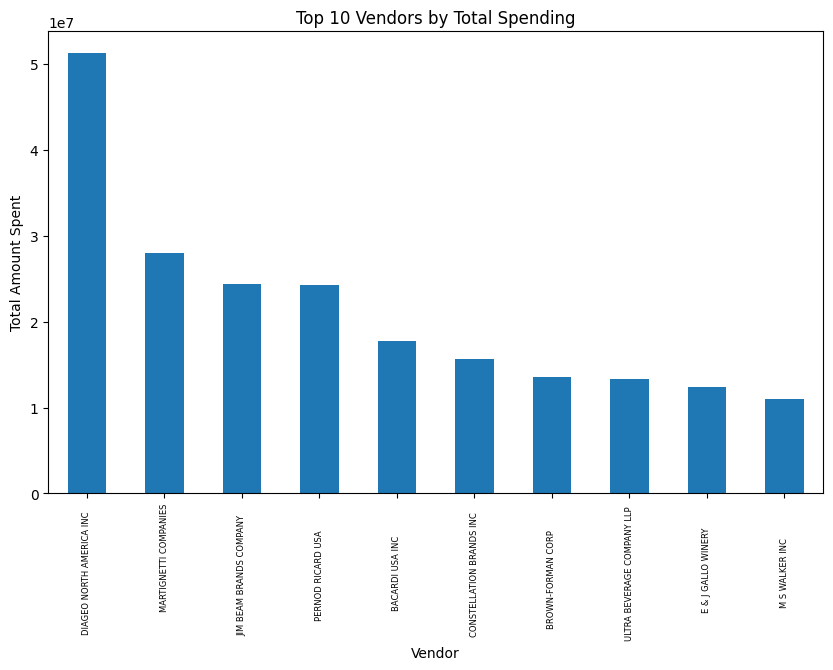

In [13]:
# Total Spending per Vendor
total_spending_per_vendor = invoice_purchases.groupby('VendorName')['TotalAmount'].sum().sort_values(ascending=False)

# Top 10 Vendors
top_n_vendors = total_spending_per_vendor.head(10)

# Visualize top vendors
plt.figure(figsize=(10, 6))
top_n_vendors.plot(kind='bar')
plt.title('Top 10 Vendors by Total Spending')
plt.xlabel('Vendor')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=90, fontsize=6)
plt.show()

#### Beginning Inventory

In [14]:
beginning_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [15]:
beginning_inventory.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [16]:
beginning_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [17]:
#Change the type for multiple columns
beginning_inventory['startDate'] = pd.to_datetime(beginning_inventory['startDate'])
beginning_inventory['Store'] = beginning_inventory['Store'].astype('category')
beginning_inventory['City'] = beginning_inventory['City'].astype('category')
beginning_inventory['Brand'] = beginning_inventory['Brand'].astype('category')

#### Final Inventory

In [18]:
final_inventory.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [19]:
final_inventory.isnull().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [20]:
final_inventory['City'] = final_inventory.groupby('Store')['City'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

In [21]:
final_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         224489 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [22]:
# Change the type for multiple columns
final_inventory['endDate'] = pd.to_datetime(final_inventory['endDate'])
final_inventory['Store'] = final_inventory['Store'].astype('category')
final_inventory['City'] = final_inventory['City'].astype('category')
final_inventory['Brand'] = final_inventory['Brand'].astype('category')
final_inventory['Size'] = final_inventory['Size'].astype('category')


#### Purchase Prices

In [23]:
purchase_prices.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [24]:
purchase_prices.isnull().sum()

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [25]:
purchase_prices.dropna(subset=['Description', 'Size', 'Volume'], inplace=True)

In [26]:
purchase_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12260 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12260 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12260 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12260 non-null  int64  
 6   PurchasePrice   12260 non-null  float64
 7   VendorNumber    12260 non-null  int64  
 8   VendorName      12260 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 957.8+ KB


In [27]:
# Change the types for multiple columns
purchase_prices['Brand'] = purchase_prices['Brand'].astype('category')
purchase_prices['Size'] = purchase_prices['Size'].astype('category')
purchase_prices['Volume'] = purchase_prices['Volume'].astype('category')
purchase_prices['Classification'] = purchase_prices['Classification'].astype('category')
purchase_prices['VendorNumber'] = purchase_prices['VendorNumber'].astype('category')
purchase_prices['VendorName'] = purchase_prices['VendorName'].astype('category')

#### Final Purchases

In [28]:
purchases_final.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [29]:
purchases_final.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64

In [30]:
# Fill missing Size values using InventoryId
purchases_final['Size'] = purchases_final.groupby('InventoryId')['Size'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

In [31]:
purchases_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


In [32]:
# Change the types of multiple columns
purchases_final['Store'] = purchases_final['Store'].astype('category')
purchases_final['Brand'] = purchases_final['Brand'].astype('category')
purchases_final['Size'] = purchases_final['Size'].astype('category')
purchases_final['VendorName'] = purchases_final['VendorName'].astype('category')
purchases_final['VendorNumber'] = purchases_final['VendorNumber'].astype('category')
purchases_final['PONumber'] = purchases_final['PONumber'].astype('category')
purchases_final['PODate'] = pd.to_datetime(purchases_final['PODate'])
purchases_final['ReceivingDate'] = pd.to_datetime(purchases_final['ReceivingDate'])
purchases_final['InvoiceDate'] = pd.to_datetime(purchases_final['InvoiceDate'])
purchases_final['PayDate'] = pd.to_datetime(purchases_final['PayDate'])
purchases_final['Classification'] = purchases_final['Classification'].astype('category')

#### Final Sales

In [33]:
sales_final.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [34]:
sales_final.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [35]:
sales_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   InventoryId     1048575 non-null  object 
 1   Store           1048575 non-null  int64  
 2   Brand           1048575 non-null  int64  
 3   Description     1048575 non-null  object 
 4   Size            1048575 non-null  object 
 5   SalesQuantity   1048575 non-null  int64  
 6   SalesDollars    1048575 non-null  float64
 7   SalesPrice      1048575 non-null  float64
 8   SalesDate       1048575 non-null  object 
 9   Volume          1048575 non-null  int64  
 10  Classification  1048575 non-null  int64  
 11  ExciseTax       1048575 non-null  float64
 12  VendorNo        1048575 non-null  int64  
 13  VendorName      1048575 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 112.0+ MB


In [36]:
# Change the type for multiple columns
sales_final['Store'] = sales_final['Store'].astype('category')
sales_final['Brand'] = sales_final['Brand'].astype('category')
sales_final['Size'] = sales_final['Size'].astype('category')
sales_final['SalesDate'] = pd.to_datetime(sales_final['SalesDate'])
sales_final['Volume'] = sales_final['Volume'].astype('category')
sales_final['Classification'] = sales_final['Classification'].astype('category')
sales_final['VendorNo'] = sales_final['VendorNo'].astype('category')
sales_final['VendorName'] = sales_final['VendorName'].astype('category')

## Inventory Analysis

In [37]:
# Grouping by Brand and Description and summarize inventory for beginning and ending of the year
beginning_inventory_summary = beginning_inventory.groupby(['Brand', 'Description'], observed=False)['onHand'].sum().sort_values(ascending=False)
final_inventory_summary = final_inventory.groupby(['Brand', 'Description'], observed=False)['onHand'].sum().sort_values(ascending=False)

# Top 10 products of beginning and end of the year
top_10_beginning = beginning_inventory_summary.head(10)
top_10_final = final_inventory_summary.head(10)

# Top 10 products at the bottom of beginning and end of year
bottom_10_beginning = beginning_inventory_summary.tail(10)
bottom_10_final = final_inventory_summary.tail(10)

print("Top 10 products at the beginning of the year:\n", top_10_beginning)
print("\nTop 10 products at the end of the year:\n", top_10_final)
print("\nBottom 10 products at the beginning of the year:\n", bottom_10_beginning)
print("\nBottom 10 products at the end of the year:\n", bottom_10_final)


Top 10 products at the beginning of the year:
 Brand  Description                 
4261   Capt Morgan Spiced Rum          15499
8068   Absolut 80 Proof                15341
3876   Smirnoff 80 Proof               14829
3545   Ketel One Vodka                 14499
6879   Maurice's Mentholated Mint      14180
3858   Grey Goose Vodka                13649
8111   Smirnoff 80 Proof               13521
1233   Jack Daniels No 7 Black         12016
4243   Bacardi Superior Rum            11640
6570   Kendall Jackson Chard Vt RSV    11586
Name: onHand, dtype: int64

Top 10 products at the end of the year:
 Brand  Description                 
3545   Ketel One Vodka                 16770
4261   Capt Morgan Spiced Rum          16769
8111   Smirnoff 80 Proof               16242
8068   Absolut 80 Proof                15608
1233   Jack Daniels No 7 Black         15047
3102   Smirnoff Traveler               14208
5111   Dr McGillicuddy's Mentholmnt    13804
1376   Jim Beam                        13180
65

- Some products, such as Ketel One Vodka, Captain Morgan Spiced Rum, and Absolut 80 Proof, maintain their positions as top-selling items from the beginning to the end of the year. This stability suggests consistent consumer demand for these products.
- Other products may show fluctuations in popularity between the beginning and end of the year. For example, Smirnoff 80 Proof appears in both lists but with different quantities on hand. This could indicate seasonal shifts in consumer preferences or marketing strategies.
- Products like Smirnoff Traveler and Dr McGillicuddy's Mentholmnt appear in the top 10 at the end of the year but not at the beginning. This suggests that these items either gained popularity over the course of the year or were introduced or heavily promoted later in the year.
- Brands like Jack Daniels and Jim Beam consistently appear in the top 10, indicating strong brand loyalty among consumers. These brands likely benefit from their established reputation and customer base.
- The absence of overlap in products with zero inventory suggests that inventory levels fluctuate throughout the year. Some products might experience periods of high demand, leading to depletion of inventory, while others might be restocked or become available later in the year.


## Sales Analysis

In [38]:
# Grouping by Brand and Description and summing up the SalesQuantity
sales_summary = sales_final.groupby(['Brand', 'Description'], observed=False)['SalesQuantity'].sum().sort_values(ascending=False)

# Top 10 best-selling items
top_10_best_selling = sales_summary.head(10)

# Bottom 10 selling items
bottom_10_selling = sales_summary.tail(10)

print("Top 10 best-selling items:")
print(top_10_best_selling)

print("\nBottom 10 selling items:")
print(bottom_10_selling)


Top 10 best-selling items:
Brand  Description                 
8111   Smirnoff 80 Proof               28544
1892   Yukon Jack                      23121
4261   Capt Morgan Spiced Rum          20226
3606   Smirnoff Raspberry Vodka        19200
5111   Dr McGillicuddy's Mentholmnt    18411
3837   Skyy Vodka                      14057
4135   Smirnoff Blueberry Vodka        12477
4157   Smirnoff Green Apple Vodka      12102
3545   Ketel One Vodka                 11883
8068   Absolut 80 Proof                11189
Name: SalesQuantity, dtype: int64

Bottom 10 selling items:
Brand  Description                 
8149   Snoqualmie Rsl Winemkrs Slct    0
       Snowden Cab Svgn The Ranch      0
       Sobieski Cytron Vodka           0
       Sobieski Espresso Vodka         0
       Sobieski Orange Vodka           0
       Sobieski Raspberry Vodka        0
       Sobieski Vanilla Vodka          0
       Sobieski Vodka                  0
       Sociando Mallet 12 Haut-Medo    0
90089  von Buhl Jazz R

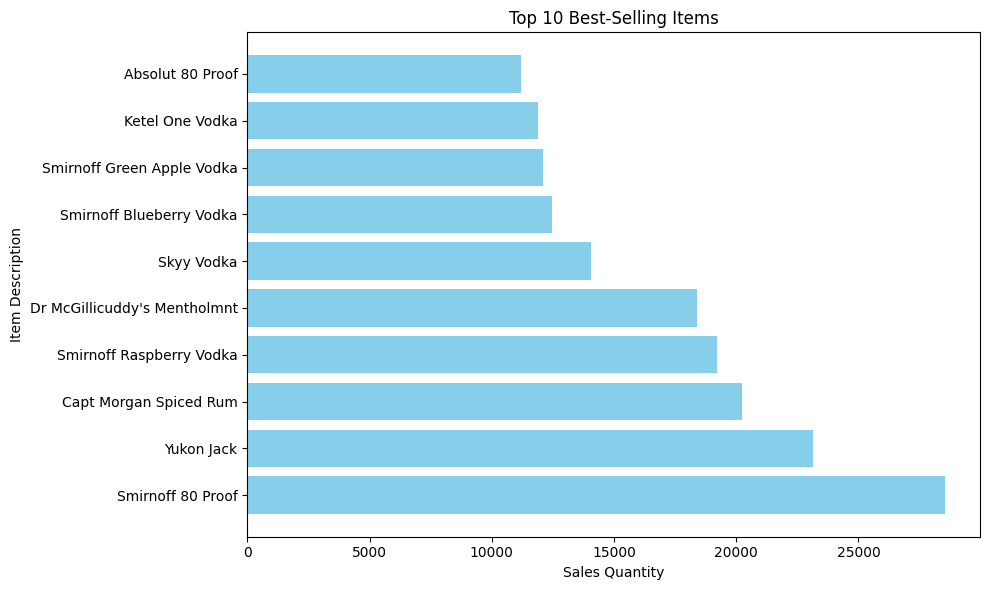

In [39]:
# Extracting data for plotting
top_10_best_selling = top_10_best_selling.reset_index()

# Creating the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the top 10 best-selling items
ax.barh(top_10_best_selling['Description'], top_10_best_selling['SalesQuantity'], color='skyblue')
ax.set_title('Top 10 Best-Selling Items')
ax.set_xlabel('Sales Quantity')
ax.set_ylabel('Item Description')

# Displaying the plot
plt.tight_layout()
plt.show()

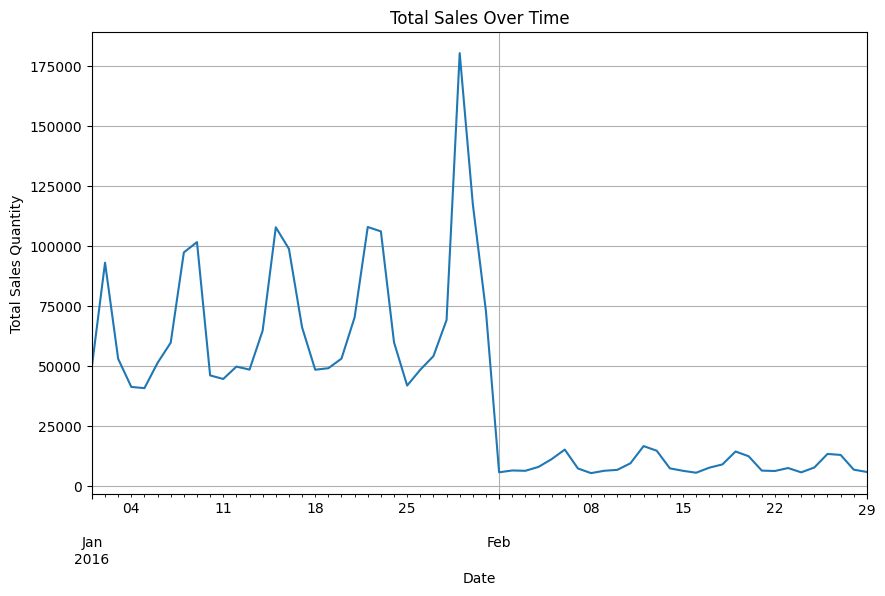

In [40]:
# Group sales data by date and sum the sales quantity for each date
sales_over_time = sales_final.groupby('SalesDate')['SalesQuantity'].sum()

# Plot the sales over time
plt.figure(figsize=(10, 6))
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.grid(True)
plt.show()

- The top-selling items are dominated by well-known brands such as Smirnoff 80 Proof, Yukon Jack, and Capt Morgan Spiced Rum, indicating strong brand recognition and consumer demand for these products.
- Flavored vodkas, such as Smirnoff Raspberry, Blueberry, and Green Apple, are also among the top sellers, suggesting a preference for variety and flavor innovation in the vodka category.
- The bottom selling items each have only one unit sold throughout the recorded sales data, indicating very low demand or possibly limited availability.
- Looking at the graph, there is a huge peak at around January 27th which could mean a promotion, or event that caused an increase in sales. Sales dropped after February 1st and stabilized.

## Purchasing Analysis

In [41]:
invoice_purchases.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,TotalAmount
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,Pending,217.73
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,Pending,149.12
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,Pending,111.21
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,Pending,140418.98
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,Pending,15956.45


In [42]:
# Group by 'VendorName' and sum the 'Quantity' column
purchases_summary = invoice_purchases.groupby('VendorName')['Quantity'].sum().sort_values(ascending=False)

# Display the top vendors by total quantity purchased
print("Top 10 vendors by total quantity purchased:\n", purchases_summary.head(10))

Top 10 vendors by total quantity purchased:
 VendorName
DIAGEO NORTH AMERICA INC       5459788
JIM BEAM BRANDS COMPANY        2737165
MARTIGNETTI COMPANIES          2637275
CONSTELLATION BRANDS INC       2325892
E & J GALLO WINERY             1858260
PERNOD RICARD USA              1647558
BACARDI USA INC                1427075
SAZERAC CO INC                 1417727
M S WALKER INC                 1372841
ULTRA BEVERAGE COMPANY LLP     1077527
Name: Quantity, dtype: int64


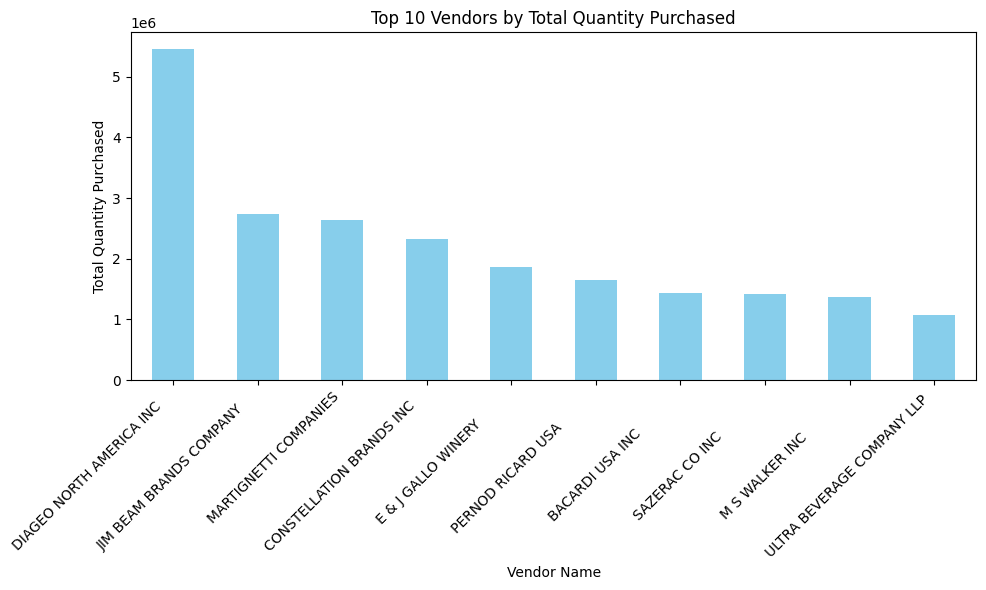

In [43]:
# Plotting bar graph for top 10 vendors by quantity
plt.figure(figsize=(10, 6))
purchases_summary.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Vendors by Total Quantity Purchased')
plt.xlabel('Vendor Name')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
# Group by 'VendorName' and sum the 'TotalAmounr' column
purchases_summary = invoice_purchases.groupby('VendorName')['TotalAmount'].sum().sort_values(ascending=False)

# Display the top vendors by total quantity purchased
print("Top 10 vendors by total amount purchased:\n", purchases_summary.head(10))

Top 10 vendors by total amount purchased:
 VendorName
DIAGEO NORTH AMERICA INC       51216828.92
MARTIGNETTI COMPANIES          27966193.83
JIM BEAM BRANDS COMPANY        24327032.02
PERNOD RICARD USA              24247871.78
BACARDI USA INC                17713664.99
CONSTELLATION BRANDS INC       15653446.89
BROWN-FORMAN CORP              13598034.76
ULTRA BEVERAGE COMPANY LLP     13278668.63
E & J GALLO WINERY             12351575.00
M S WALKER INC                 10991369.12
Name: TotalAmount, dtype: float64


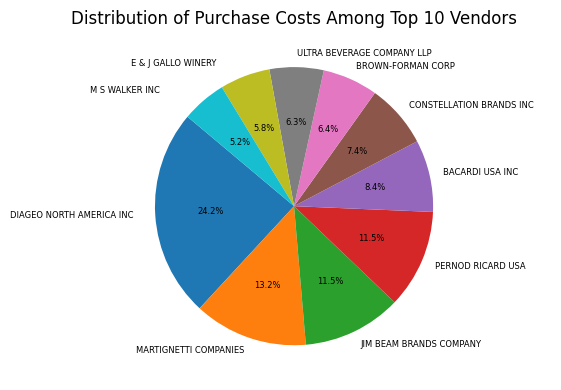

In [45]:
# Plotting pie chart for distribution of purchase costs among top 10 vendors
plt.figure(figsize=(6, 4))
purchases_summary.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, fontsize=6)
plt.title('Distribution of Purchase Costs Among Top 10 Vendors')
plt.ylabel("")
plt.tight_layout()
plt.show()

- The bar chart and pie chart shows the top 10 vendors by purchase cost. DIAGEO NORTH AMERICA INC accounts for almost 25% lead over the other vendors. JIM BEAM BRAND COMPANY and PERNOD RICARD USA have equal distribution in purchase costs. 
- DIAGEO NORTH AMERICA INC holds the lead as the top vendor with the highest quantity purchased at 5,459,788. From there, we have JIM BEAM BRANDS COMPANY and MARTIGNETTI COMPANIES as the 2nd and 3rd highest at 2,737,165 and 2,637,275 respectively.
- Also, notable that these same companies are also in the top 10 vendors with the highest purchase cost as well.
- Interesting to see that DIAGEO NORTH AMERICA INC has a 1.5 million lead in quantity and purchase cost then the next vendor indicating high popularity with that vendor.

In [46]:
# Calculate average supply duration
purchases_final['SupplyDuration'] = (purchases_final['ReceivingDate'] - purchases_final['PODate']).dt.days
average_supply_duration = purchases_final['SupplyDuration'].mean()
print("Average Supply Duration (in days):", average_supply_duration)

# Calcualte average payment duration
purchases_final['PaymentDuration'] = (purchases_final['PayDate'] - purchases_final['InvoiceDate']).dt.days
average_payment_duration = purchases_final['PaymentDuration'].mean()
print("Average Payment Duration (in days):", average_payment_duration)

Average Supply Duration (in days): 7.620738941712323
Average Payment Duration (in days): 35.658806376803284


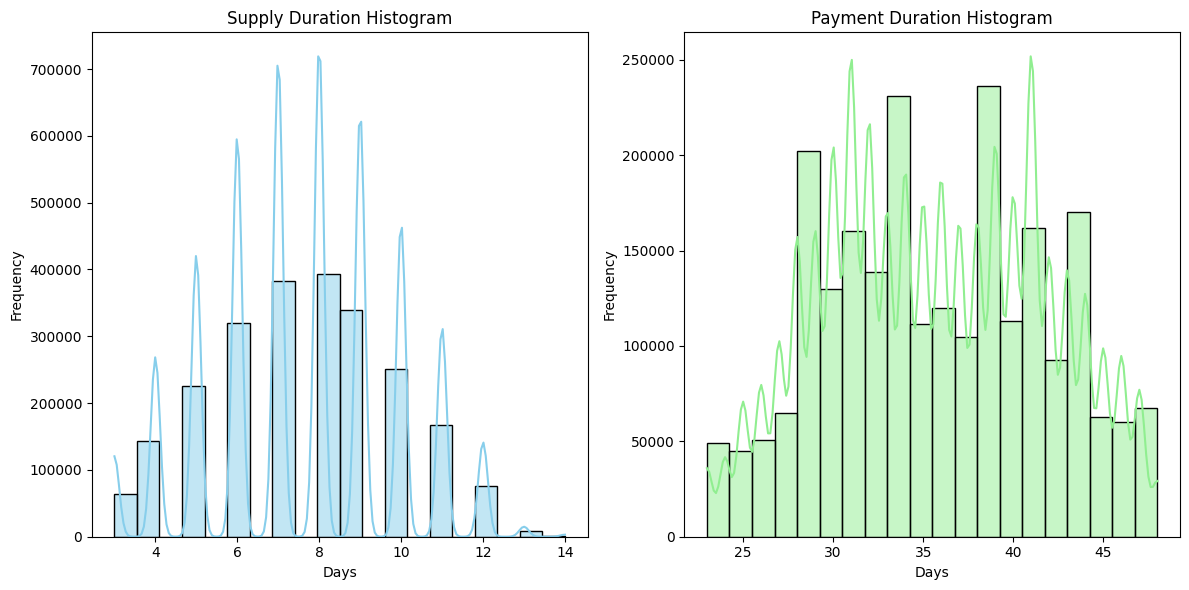

In [47]:
# Create histograms for supply duration and payment duration
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(purchases_final['SupplyDuration'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Supply Duration Histogram')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(purchases_final['PaymentDuration'], kde=True, bins=20, color='lightgreen', edgecolor='black')
plt.title('Payment Duration Histogram')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Supply and Payment Durations
- The average supply duration of approximately 7.62 days suggests that, on average, it takes about 7.62 days for orders to be fulfilled from the time a purchase order (PO) is issued to the time the items are received.
- On the other hand, the average payment duration of approximately 35.66 days indicates the average time it takes for payments to be made after the invoice date. For some reason, there is a delay in this process or there are credit terms agreed upon with the vendors
- Histogram helps to visualize that the average is around 8 days for supply duration. There seem to be regular intervals that suggest there might be specific supply cycles or schedules for when product is received.
- Oscillation has been found between 25 to 45 days, which helps suggest variability in terms of payment or something else.

In [48]:
# Calculate the total number of days in the sales data
start_date = sales_final['SalesDate'].min()
end_date = sales_final['SalesDate'].max()
total_days = (end_date - start_date).days

# Calculate Sales Velocity for each product
sales_velocity = sales_final.groupby(['Brand', 'Description'], observed=True).agg(Total_Sales=('SalesQuantity', 'sum')).reset_index()
sales_velocity['Sales_Per_Day'] = sales_velocity['Total_Sales'] / total_days

# Calculate Lead Time for each product
purchases_final['Lead_Time'] = (purchases_final['ReceivingDate'] - purchases_final['PODate']).dt.days
lead_times = purchases_final.groupby(['Brand', 'Description'], observed=True).agg(Avg_Lead_Time=('Lead_Time', 'mean')).reset_index()

# Merge the data
merged_data = pd.merge(sales_velocity, lead_times, on=['Brand', 'Description'], how='left')

# Calculate Optimal Stock Level
merged_data['Optimal_Stock_Level'] = merged_data['Sales_Per_Day'] * merged_data['Avg_Lead_Time']

# Calculate Safety Stock using maximum sales for each product
max_sales = sales_final.groupby(['Brand', 'Description'], observed=True).agg(Max_Daily_Sales=('SalesQuantity', 'max')).reset_index()
merged_data = pd.merge(merged_data, max_sales, on=['Brand', 'Description'], how='left')

merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']

# Filter products where Sales_Per_Day value is greater than Max_Daily_Sales value
problematic_products = merged_data[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales']]

# Get the number of problematic products
num_problematic_products = len(problematic_products)

# Print problematic products to the screen
print(f"There are {num_problematic_products} products where the Sales_Per_Day value is greater than the Max_Daily_Sales value.")
if num_problematic_products > 0:
    print(problematic_products[['Brand', 'Description', 'Sales_Per_Day', 'Max_Daily_Sales']])

There are 555 products where the Sales_Per_Day value is greater than the Max_Daily_Sales value.
      Brand                   Description  Sales_Per_Day  Max_Daily_Sales
7        77   Three Olives Espresso Vodka      15.389831                8
8        79      Three Olives Loopy Vodka       7.050847                5
76      273      Sauza Extra Gold Tequila      10.372881                9
139     482              Absolut 80 Proof      37.135593               23
142     497        Capt Morgan Spiced Rum      39.644068               38
...     ...                           ...            ...              ...
7426  44712    Sonoma-Cutrer Chard Sonoma      27.610169               25
7580  46379  Ghost Pine Cab Svgn LMartini      14.474576               12
7590  46447         Gascon Malbec Mendoza      22.796610               16
7592  46458      Layer Cake Barosa Shiraz       7.305085                7
7594  46476          Tilia Malbec Mendoza      26.169492               19

[555 rows x 4 c

In [49]:
# Define a custom function to update Max_Daily_Sales, Safety_Stock, and Recommended_Stock_Level
def update_stock_levels(row):
    if row['Sales_Per_Day'] > row['Max_Daily_Sales']:
        row['Max_Daily_Sales'] = row['Sales_Per_Day']
    row['Safety_Stock'] = row['Max_Daily_Sales'] - row['Sales_Per_Day']
    row['Recommended_Stock_Level'] = row['Optimal_Stock_Level'] + row['Safety_Stock']
    return row

# Apply the custom function to update stock levels
merged_data = merged_data.apply(update_stock_levels, axis=1)


In the context of inventory management, the Max_Daily_Sales should indeed never be lower than the average Sales_Per_Day. This would suggest that the highest sales recorded in a single day are less than the average daily sales, which is illogical.

In our dataset, we identified 555 products where this inconsistency occurred. To rectify this, we adjusted the Max_Daily_Sales values to match the Sales_Per_Day for these products. This correction ensures that the maximum daily sales are at least as high as the average, maintaining logical consistency in our inventory records.

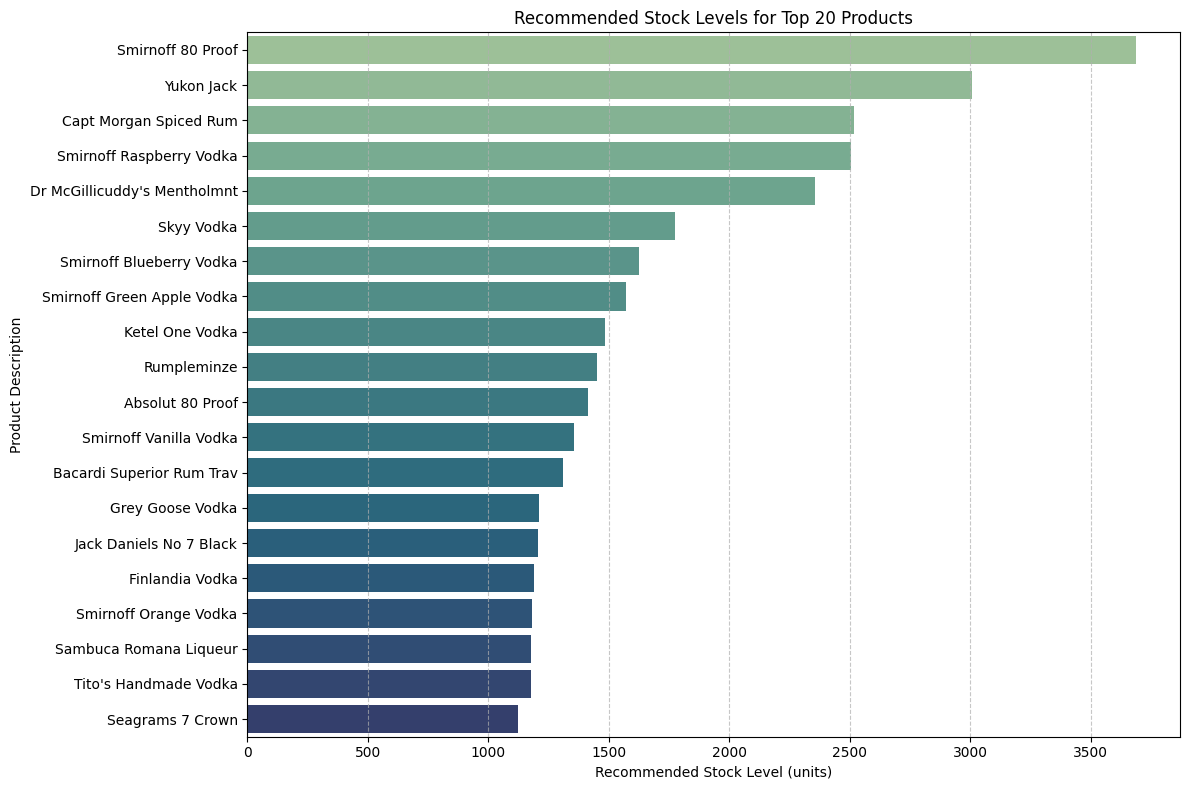

In [50]:
# Sorting the data by Recommended_Stock_Level for better visualization
sorted_data = merged_data.sort_values(by='Recommended_Stock_Level', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))  # Adjusting figure size
sns.barplot(x='Recommended_Stock_Level', y='Description', hue='Description', data=sorted_data.head(20), palette='crest', legend=False)
plt.xlabel('Recommended Stock Level (units)')
plt.ylabel('Product Description')
plt.title('Recommended Stock Levels for Top 20 Products')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adding grid lines for better readability
plt.tight_layout()
plt.show()

The bar chart visually represents the recommended stock levels for the top 20 products. Smirnoff 80 Proof is the top product with the highest suggested stock level. Also, product like Seagrams 7 Crown and Tito's Handmade Vodka have lower recommended stock levels. This chart helps to aid in quick decision-making as you can see what products need inventory replenishment and allocation.

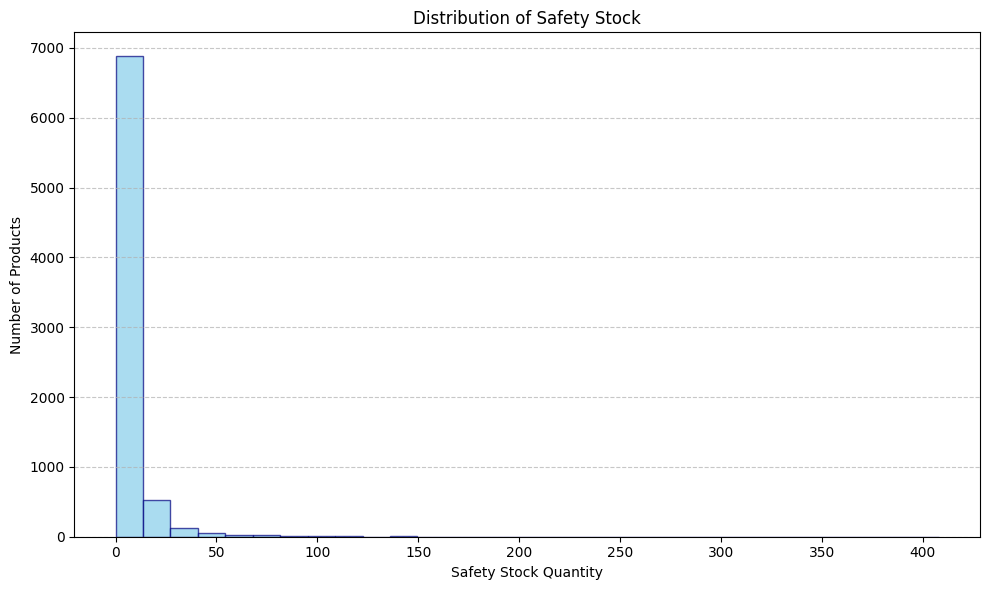

In [51]:
# Plotting the histogram for Safety Stock distribution
plt.figure(figsize=(10,6))
plt.hist(merged_data['Safety_Stock'], bins=30, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Distribution of Safety Stock')
plt.xlabel('Safety Stock Quantity')
plt.ylabel('Number of Products')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

A significant majority of products have their safety stock quantities close to zero or near zero. This means, if there is an event that necessitates more quantities, these products will experience stock-out and possibly customer dissatisfaction. 

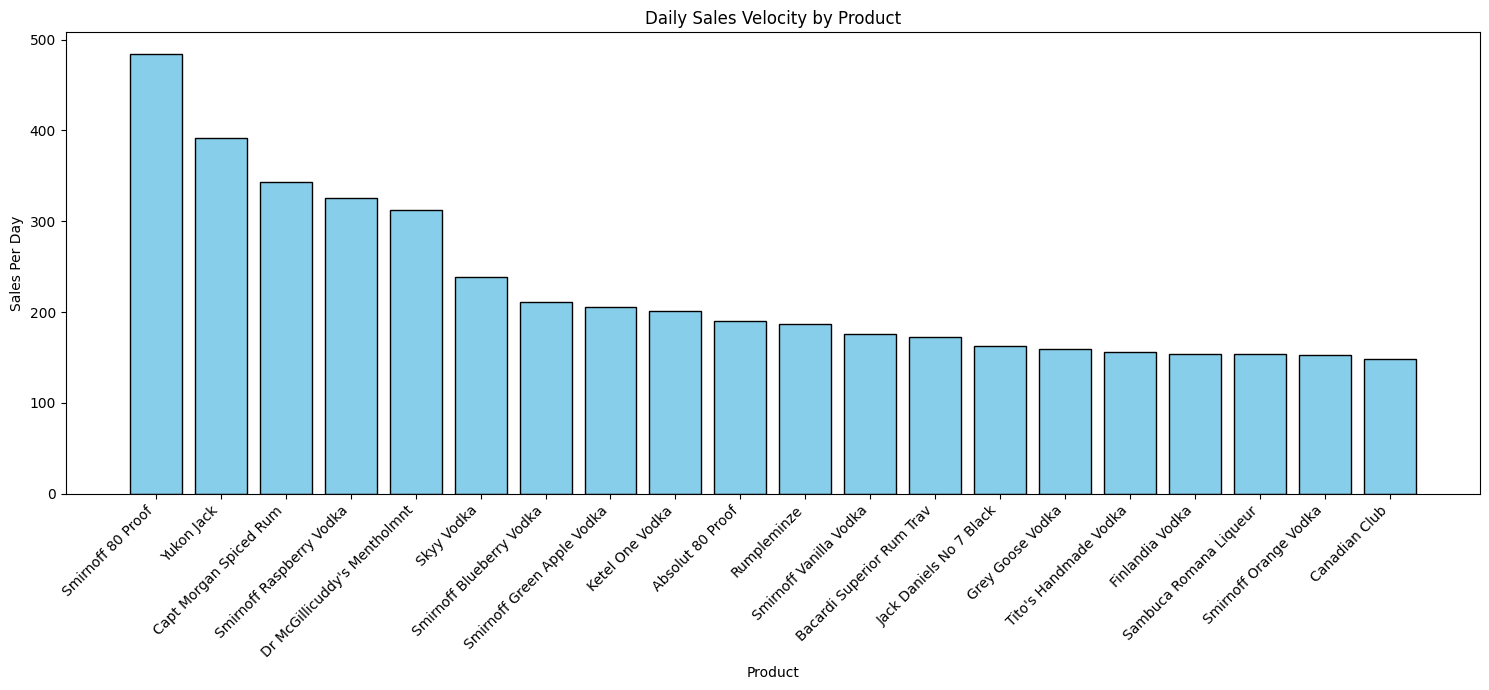

In [52]:
# Sorting the data by Sales_Per_Day in descending order to get top products
top_products = sales_velocity.nlargest(20, 'Sales_Per_Day')

# Creating the bar plot
plt.figure(figsize=(15, 7))
plt.bar(top_products['Description'], top_products['Sales_Per_Day'], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Daily Sales Velocity by Product')
plt.xlabel('Product')
plt.ylabel('Sales Per Day')
plt.tight_layout()
plt.show()


Looking at daily sales per product, its evident that Smirnoff 80 Proof is the preffered choice with many customers. As we move the right, the sales per day decreases, which means customer demand decreases with these products. This provides valuable insights for inventory management, as it suggests for products like Smirnoff 80 Proof, should have healthy inventory at all times with possible safety stock implemented.

## Optimal Inventory Level Determination

      Brand                   Description  Current_Stock  \
0        58   Gekkeikan Black & Gold Sake          385.0   
1        60        Canadian Club 1858 VAP          146.0   
2        61         Margaritaville Silver           12.0   
3        62      Herradura Silver Tequila          459.0   
4        63    Herradura Reposado Tequila          442.0   
...     ...                           ...            ...   
7653  90084  Les Fiefs Lagrange St Jul 11            2.0   
7654  90085  Ch Lilian 09 Ladouys St Este            6.0   
7655  90086  La Dame Montrose St Estep 11           32.0   
7656  90087  Ch Mouton Rothschild 12 Paui           45.0   
7657  90089    Ch Lynch Bages 12 Pauillac          124.0   

      Recommended_Stock_Level  Order_Quantity  
0                   39.990104        0.000000  
1                   16.996855        0.000000  
2                   14.894394        2.894394  
3                   20.384988        0.000000  
4                   18.042373        0.

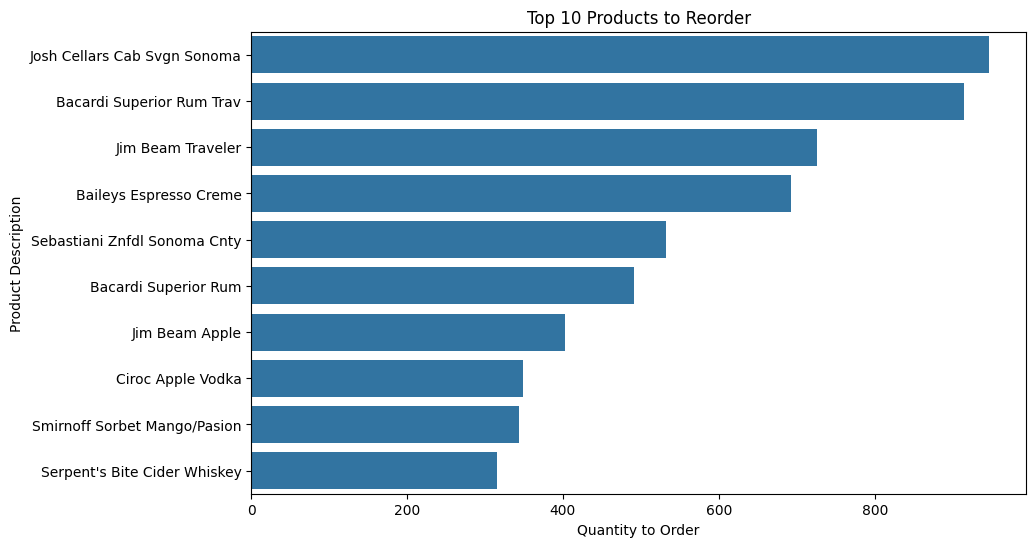

In [53]:
# Finding the latest inventory date
latest_inventory_date = final_inventory['endDate'].max()

# Selecting records with the latest inventory date
current_inventory = final_inventory[final_inventory['endDate'] == latest_inventory_date]

# Summarizing current stock levels by product
current_stock_levels = current_inventory.groupby(['Brand', 'Description'], observed=True)['onHand'].sum().reset_index(name='Current_Stock')

# Merging current stock levels with previously calculated data
final_data = pd.merge(merged_data, current_stock_levels, on=['Brand', 'Description'], how='left')

# Filling missing current stock with 0
final_data['Current_Stock'] = final_data['Current_Stock'].fillna(0)

# Calculating order quantity for products below recommended levels
final_data['Order_Quantity'] = final_data['Recommended_Stock_Level'] - final_data['Current_Stock']
final_data['Order_Quantity'] = final_data['Order_Quantity'].clip(lower=0)

# Reporting the results
print(final_data[['Brand', 'Description', 'Current_Stock', 'Recommended_Stock_Level', 'Order_Quantity']])

# Creating a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Quantity', y='Description', data=final_data.sort_values('Order_Quantity', ascending=False).head(10))
plt.title('Top 10 Products to Reorder')
plt.xlabel('Quantity to Order')
plt.ylabel('Product Description')
plt.show()

These are the top 10 products that need to be reordered based on the inventory data. This is determined by the difference between the stock levels and current stock on hand. So if the current stock is below the recommended level, the product will appear on this list and then sorted by highest quantity to lowest. From the graph, we can see that Josh Cellars Cab Svgn Sonoma and Bacardi Superiod Rum Trav are the two products with the highest quantity to reorder, which have surpasses the 800 unit mark. The product with the least quantity to reorder is Serpent's Bite Cider Whiskey. 

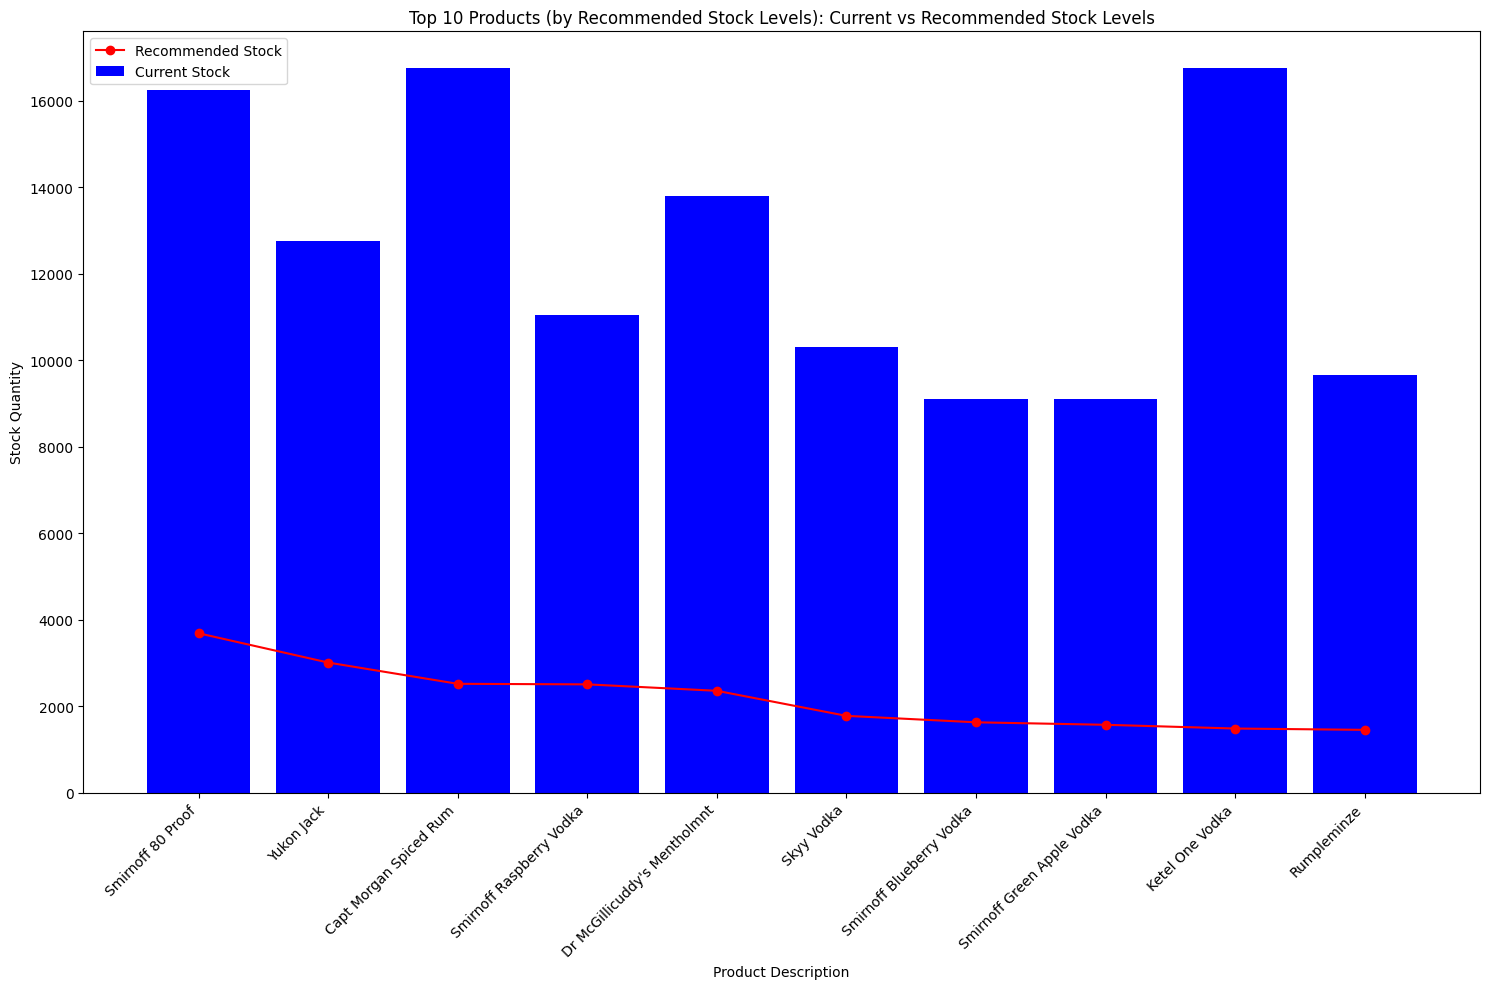

In [54]:
# Sorting the products by recommended stock level
sorted_data = final_data.sort_values(by='Recommended_Stock_Level', ascending=False).head(10)  # To show the top 10 products

# Creating a line plot for recommended stock levels
plt.figure(figsize=(15, 10))
plt.plot(sorted_data['Description'], sorted_data['Recommended_Stock_Level'], marker='o', color='r', label='Recommended Stock')

# Creating a bar plot for current stock levels
plt.bar(sorted_data['Description'], sorted_data['Current_Stock'], color='b', label='Current Stock')

# Setting the labels and title
plt.xlabel('Product Description')
plt.ylabel('Stock Quantity')
plt.title('Top 10 Products (by Recommended Stock Levels): Current vs Recommended Stock Levels')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

 This graph shows there is a significant surplus in the current stock levels when compared to the recommended stock levels for these products. The most notable ones are Smirnoff 80 Prof, Capt Morgan Spiced Rum, and Ketel One Vodka, in which they have highest difference between current stock and recommended stock.

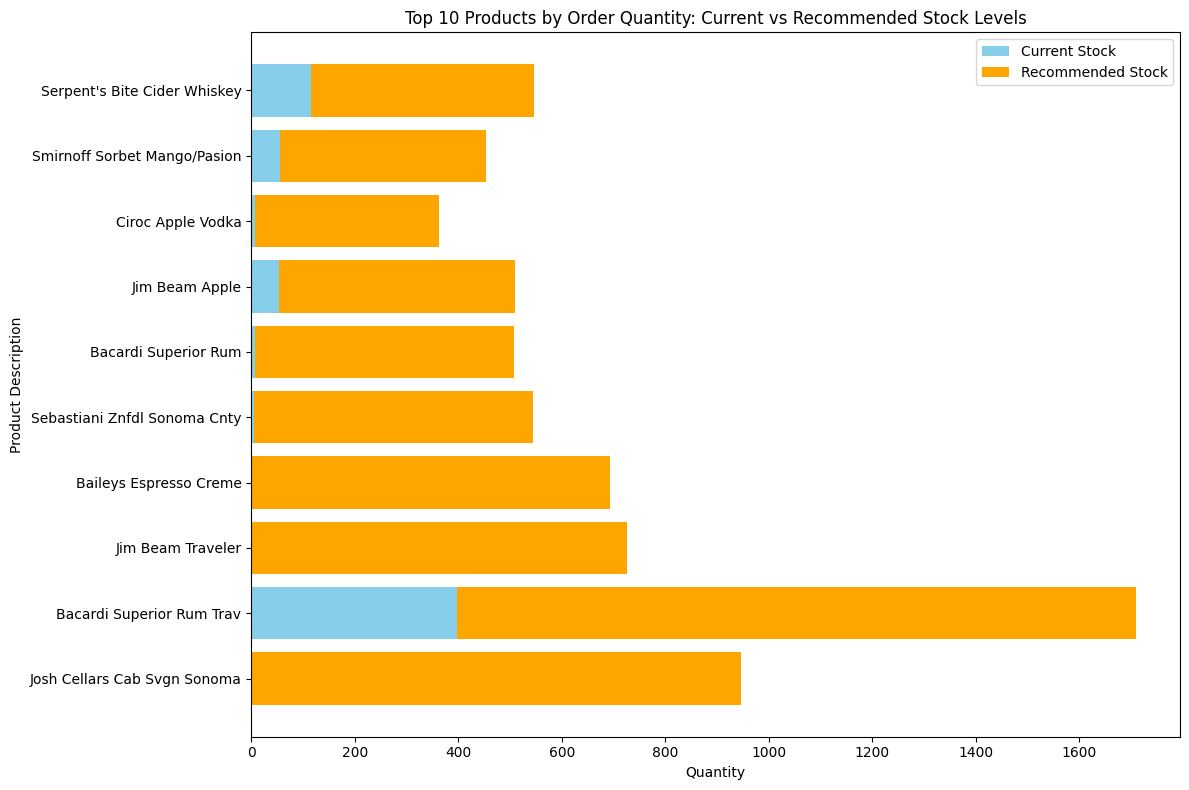

In [55]:
# Sorting the data to show the top 10 products where the ordering quantity is highest
top_products_to_order = final_data.nlargest(10, 'Order_Quantity')

# Creating a horizontal bar plot
plt.figure(figsize=(12, 8))

# Plotting current stock and recommended stock side by side
plt.barh(top_products_to_order['Description'], top_products_to_order['Current_Stock'], color='skyblue', label='Current Stock')
plt.barh(top_products_to_order['Description'], top_products_to_order['Recommended_Stock_Level'], color='orange', label='Recommended Stock', left=top_products_to_order['Current_Stock'])

# Adding legend and labels
plt.legend()
plt.xlabel('Quantity')
plt.ylabel('Product Description')
plt.title('Top 10 Products by Order Quantity: Current vs Recommended Stock Levels')

# Display the plot
plt.tight_layout()
plt.show()

This graph shows the top 10 products by order quantity. As you can see, many of these products are below the recommended stock. The most notable is Bacardi Superior Rum Trav which a sizeable difference in stock. All of these products are indicaating a need for restocking to meet the suggested inventory.

## ABC Analysis

In [56]:
# Calculate annual usage value for each item
beginning_inventory['AnnualUsageValue'] = beginning_inventory['onHand'] * beginning_inventory['Price']
annual_usage_value = beginning_inventory.groupby(['Brand', 'Description'], observed=False)['AnnualUsageValue'].sum().reset_index()

# Sort items by annual usage value in descending order
annual_usage_value_sorted = annual_usage_value.sort_values(by='AnnualUsageValue', ascending=False)

# Calculate cumulative percentage of annual usage value
annual_usage_value_sorted['CumulativePercentage'] = annual_usage_value_sorted['AnnualUsageValue'].cumsum() / annual_usage_value_sorted['AnnualUsageValue'].sum()

# Classify items into ABC categories
def classify_ABC_category(percentage):
    if percentage <= 0.2:
        return 'A'
    elif percentage <= 0.5:
        return 'B'
    else:
        return 'C'

annual_usage_value_sorted['Category'] = annual_usage_value_sorted['CumulativePercentage'].apply(classify_ABC_category)

# Display ABC analysis results
print("ABC Analysis Results:")
print(annual_usage_value_sorted)
print(annual_usage_value_sorted['Category'].value_counts())

ABC Analysis Results:
          Brand              Description  AnnualUsageValue  \
10131124   3545          Ketel One Vodka         463823.01   
3598059    1233  Jack Daniels No 7 Black         432455.84   
19211858   8068         Absolut 80 Proof         383371.59   
12745840   4261   Capt Morgan Spiced Rum         340823.01   
11471982   3858         Grey Goose Vodka         327439.51   
...         ...                      ...               ...   
19672461   8237      Celani Family Chard              0.00   
19672462   8237       Cellar No 8 Pnt Nr              0.00   
19672463   8237        Cellar No 8 Znfdl              0.00   
19672464   8237     Celtic Honey Liqueur              0.00   
59013353  90090        von Buhl Jazz Rsl              0.00   

          CumulativePercentage Category  
10131124              0.006816        A  
3598059               0.013170        A  
19211858              0.018804        A  
12745840              0.023812        A  
11471982              0

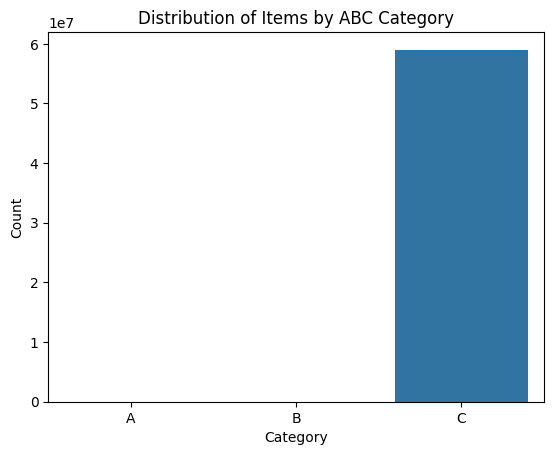

In [57]:
# Create a graph
sns.countplot(x='Category', data=annual_usage_value_sorted)
plt.title('Distribution of Items by ABC Category')
plt.xlabel('Category')
plt.ylabel('Count')

plt.show()

Category A: Contains 97 items. These items have the highest annual usage value or importance to the business. They likely contribute significantly to revenue or require the most attention in terms of inventory management. These items are critical and should be closely monitored and managed to ensure their availability.

Category B: Contains 564 items. These items have moderate annual usage value or importance compared to Category A items. While they are not as critical as Category A items, they still warrant attention and may require more frequent monitoring and tighter inventory control compared to Category C items.

Category C: Contains 59,012,693 items. These items have the lowest annual usage value or importance to your business. While they may still contribute to the overall inventory, they are less critical than Category A and B items. Inventory control measures for Category C items may be more relaxed compared to the other categories, allowing for cost optimization and efficient resource allocation.